# Distance plots

Notebook to create plots that show the distance as well as the invocation of the base controller over time.

In [88]:
import pathlib
import readDistances

baseDir = pathlib.Path().resolve()
infilename = str(baseDir) + "/../cmake-build-release/bin/minimal_distances.txt"


200


In [89]:
from cProfile import label
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np

def extend_edges(inarray):
    tmp = inarray
    for i in range(len(inarray)):
        # extend rising edge
        if i != len(inarray)-1 and not inarray[i] and inarray[i+1]:
            tmp[i] = True
        # extend falling edge
        if i != len(inarray)-1 and inarray[i] and not inarray[i+1]:
            tmp[i] = True
    # shift all by one, add initial
    out = [inarray[0]]
    for i in range(len(inarray)-1):
        out.append(tmp[i])
    return out

def plot(data):
    fig, ax = plt.subplots()
    alph = 1.0
    max_iterations = 1000
    
    #ax.hlines(y_limits[var][0], xmin=0, xmax=1000, linewidth=0.1)
    #ax.hlines(y_limits[var][1], xmin=0, xmax=1000, linewidth=0.1)
    use_basecontroller_after_training = extend_edges([ y['adv'] == False and y['training'] == True for y in data if y['it'] < max_iterations])
    use_basecontroller = extend_edges([ y['adv'] == False and y['training'] == False for y in data if y['it'] < max_iterations])
    use_advancedcontroller_after_training = extend_edges([ y['adv'] == True and y['training'] == True for y in data if y['it'] < max_iterations])
    use_advancedcontroller = extend_edges([ y['adv'] == True and y['training'] == False for y in data if y['it'] < max_iterations])
    distances = [ y['dist'] for y in data if y['it'] < max_iterations]
    x = [x+1 for x in range(len(use_advancedcontroller))]
    
    print(str(len(x)))
    print(str(len(use_advancedcontroller)))
    
    ax.fill_between(x, distances, where=use_basecontroller, alpha=.5*alph, label='used BC, no training', color='orange')
    ax.fill_between(x, distances, where=use_advancedcontroller, alpha=.5*alph, label='used AC, no training', color='green')
    ax.fill_between(x, distances, where=use_basecontroller_after_training, alpha=alph, label='used BC, after training', color='orange')
    ax.fill_between(x, distances, where=use_advancedcontroller_after_training, alpha=alph, label='used AC, after training', color='green')
        
    ax.set_xlabel('time (control cycles)')
    ax.set_ylabel('distance to track boundary')
    ax.legend(loc='upper left')
    
    plt.savefig('distances.png', dpi=600, pad_inches=0.0, bbox_inches='tight')
    plt.show()

200
200


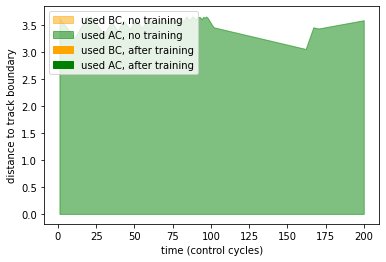

In [90]:
data = readDistancesFile(infilename)

plot(data)